<a href="https://colab.research.google.com/github/Rodaina1997/Facial-recognition/blob/main/FaceRecognition_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

#
from sklearn.decomposition import PCA
#
import cv2 as cv
#
import os
#importing data from google drive
from google.colab import drive

#
from sklearn.model_selection import train_test_split
from PIL import Image 

#
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score

# Loading files


In [ ]:
drive.mount('/content/drive')
dataset_path ='/content/drive/MyDrive/Pattern_Recognition/dataset'

Mounted at /content/drive


#Data Matreix Generation and the Label vector

In [ ]:
#sub_folders=[]

Data_Matrix_D=np.zeros((400,10304),dtype='int64')  #Data single MAtrix
Label_Vector_Y=np.zeros((400,1),dtype='int64')   #label vector 

i=0

for  subjects in range(1,41):
  sub_subjects=os.listdir(dataset_path+'/s'+str(subjects))
  for images in sub_subjects:
    img=cv.imread(dataset_path+'/s'+str(subjects)+'/'+images,0)  # zero for single channel(gray scale)
    print(img.shape)
    Data_Matrix_D[i,:]=img.flatten()# to flatten 2d matrix image into a single mattrix 10304
    Label_Vector_Y[i]=(int(subjects))
    i+=1
  
# for results checking   
#print("Size of image vector = "+str(len(img_to_vector)))
print("length of Data Matrix = "+str(Data_Matrix_D.shape))
print("length of label vector = "+str(len(Label_Vector_Y)))


(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)


# Split the Dataset into Training and Test sets

In [ ]:
train_split_value = int(Data_Matrix_D.shape[0]*(5/10))#200
test_split_value = Data_Matrix_D.shape[0] - train_split_value#200 

training_data=np.zeros((train_split_value,10304),dtype='int64')#200*10304
training_labels=np.zeros((train_split_value,1),dtype='int64')#200*1

test_data= np.zeros((test_split_value,10304),dtype='int64')#)#200*10304
test_labels=np.zeros((test_split_value,1),dtype='int64')#)#200*1



train_count1=0
test_count1=0
train_count2=0
test_count2=0


for i in range(Data_Matrix_D.shape[0]):#data

  if(i%2)==0:
    training_data[train_count1,:]=Data_Matrix_D[i]
    train_count1+=1

  else:
    test_data[test_count1]=Data_Matrix_D[i]
    test_count1+=1
    
    

for j in range(Data_Matrix_D.shape[0]):#labels

  if(j%2)==0:
    training_labels[train_count2]=Label_Vector_Y[j]
    train_count2+=1
  else:
    test_labels[test_count2]=Label_Vector_Y[j]
    test_count2+=1
    
   
    
print(len(Data_Matrix_D))
print("length of traing_data matrix= "+str(len(training_data)))
print("length of test_data matrix= "+str(len(test_data)))
print("length of traing_labels matrix= "+str(len(training_labels)))
print("length of test_labels matrix= "+str(len(test_labels)))


print(training_data.shape)
print(test_data)



400
length of traing_data matrix= 200
length of test_data matrix= 200
length of traing_labels matrix= 200
length of test_labels matrix= 200
(200, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 44  43  32 ...  43  43  37]
 ...
 [119 121 123 ...  36  40  36]
 [127 131 128 ...  94  84  89]
 [130 123 127 ...  33  37  40]]


# Reduction using PCA





In [ ]:
alpha1=0.8
alpha2=0.85
alpha3=0.9
alpha4=0.95
sum_of_eigen_values_lower=0
fraction_of_total_variance=[]
projection_matrix_1=[]
projection_matrix_2=[]
projection_matrix_3=[]
projection_matrix_4=[]

#computing projection matrices(a)

Mean=np.mean(training_data,axis=0) #computing the mean of every feature(column)
Z=training_data - Mean.T #centering the matrix  # el mfrood tb2a mean transpose?
Cov_matrix=np.cov(Z) #computing the covariance matrix
cov2=(np.dot(Z.T,Z))/len(training_data)
Eigen_values,Eigen_vectors=LA.eigh(cov2) #computing eigen values
#Eigen_vectors=LA.eig(cov2)[1] #computing eigen vectors
#sorted_values=np.sort(Eigen_values)
#sorted_vectors=np.sort(Eigen_vectors)
indices_sorted=Eigen_values.argsort()[::-1]
sorted_values=Eigen_values[indices_sorted]
sorted_vectors=Eigen_vectors[:,indices_sorted]



d=len(sorted_values) #number of eigen values
for i in range(0,d):
  sum_of_eigen_values_lower+=sorted_values[i]

r=1
while r<=d:

  sum_of_eigen_values_upper=0

  for k in range(0,r):
    sum_of_eigen_values_upper+=sorted_values[k]

  fraction_of_total_variance.append((sum_of_eigen_values_upper)/(sum_of_eigen_values_lower)) #getting the fractions of total variance
  r+=1

r_values_1=[]
r_values_2=[]
r_values_3=[]
r_values_4=[]

for n in range(0,len(fraction_of_total_variance)):
  if (fraction_of_total_variance[n])>=alpha1:
    r_values_1.append(n) #getting the r values such that f(r)>=alpha1

  if (fraction_of_total_variance[n])>=alpha2:
    r_values_2.append(n) #getting the r values such that f(r)>=alpha2

  if (fraction_of_total_variance[n])>=alpha3:
    r_values_3.append(n)  #getting the r values such that f(r)>=alpha3

  if (fraction_of_total_variance[n])>=alpha4:
    r_values_4.append(n)  #getting the r values such that f(r)>=alpha4

#getting the min r in every set
smallest_r_1=(min(r_values_1))+1 
smallest_r_2=(min(r_values_2))+1
smallest_r_3=(min(r_values_3))+1
smallest_r_4=(min(r_values_4))+1

#getting the projection matrices using r1,r2,r3,r4
for p in range(0,smallest_r_1):
  projection_matrix_1.append(sorted_vectors[p])

for q in range(0,smallest_r_2):
  projection_matrix_2.append(sorted_vectors[q])

for r in range(0,smallest_r_3):
  projection_matrix_3.append(sorted_vectors[r])

for s in range(0,smallest_r_4):
  projection_matrix_4.append(sorted_vectors[s])  


#arrays of projection matrices lists
arr_proj_matrix1 = np.array(projection_matrix_1)
arr_proj_matrix2 = np.array(projection_matrix_2)
arr_proj_matrix3 = np.array(projection_matrix_3)
arr_proj_matrix4 = np.array(projection_matrix_4)

#projecting training and test datasets using the projection matrices(b)

reduced_training_data_1=np.dot(training_data,arr_proj_matrix1.T)
reduced_test_data_1=np.dot(test_data,arr_proj_matrix1.T)

reduced_training_data_2=np.dot(training_data,arr_proj_matrix2.T)
reduced_test_data_2=np.dot(test_data,arr_proj_matrix2.T)

reduced_training_data_3=np.dot(training_data,arr_proj_matrix3.T)
reduced_test_data_3=np.dot(test_data,arr_proj_matrix3.T)

reduced_training_data_4=np.dot(training_data,arr_proj_matrix4.T)
reduced_test_data_4=np.dot(test_data,arr_proj_matrix4.T)


print((reduced_training_data_1.shape))
print((reduced_test_data_1.shape))
print((reduced_training_data_2.shape))
print((reduced_test_data_2.shape))
print((reduced_training_data_3.shape))
print((reduced_test_data_3.shape))
print((reduced_training_data_4.shape))
print((reduced_test_data_4.shape))






(200, 36)
(200, 36)
(200, 52)
(200, 52)
(200, 77)
(200, 77)
(200, 116)
(200, 116)


In [ ]:
def KNN_Classifier(k,training_data_reduced,test_data_reduced):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data_reduced,training_labels)
  test_pred = classifier.predict(test_data_reduced)
  return test_pred

def KNN_Accuracy(alpha,test_prediction):
   result=metrics.accuracy_score(test_labels, test_prediction)
   print("Accuracy for alpha = {} is {} ".format(alpha,result))
   return result  

In [ ]:
#Using a simple classifier,first Nearest Neighbor to determine the class labels(c)

#reduced_training_data_1
test_data_1_predection=KNN_Classifier(1,reduced_training_data_1,reduced_test_data_1)

#reduced_training_data_2
test_data_2_predection=KNN_Classifier(1,reduced_training_data_2,reduced_test_data_2)

#reduced_training_data_3
test_data_3_predection=KNN_Classifier(1,reduced_training_data_3,reduced_test_data_3)

#reduced_training_data_4
test_data_4_predection=KNN_Classifier(1,reduced_training_data_4,reduced_test_data_4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum

In [ ]:
#Report Accuracy for every value of alpha separately.

# for alpha =0.8
accurecy_alpha_1= KNN_Accuracy(0.8,test_data_1_predection)

# for alpha =0.85
accurecy_alpha_2=KNN_Accuracy(0.85,test_data_2_predection)

# for alpha =0.9
accurecy_alpha_3=KNN_Accuracy(0.9,test_data_3_predection)

# for alpha =0.95
accurecy_alpha_4=KNN_Accuracy(0.95,test_data_4_predection)


Accuracy for alpha = 0.8 is 0.685 
Accuracy for alpha = 0.85 is 0.82 
Accuracy for alpha = 0.9 is 0.855 
Accuracy for alpha = 0.95 is 0.905 


[0.685, 0.82, 0.855, 0.905]


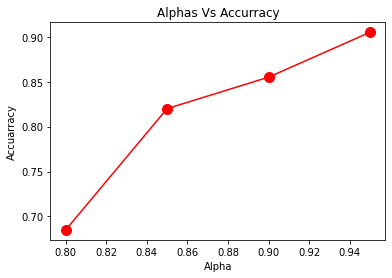

In [ ]:
alphas=[0.8,0.85,0.9,0.95]
Accuracies=[]
Accuracies.append(accurecy_alpha_1)
Accuracies.append(accurecy_alpha_2)
Accuracies.append(accurecy_alpha_3)
Accuracies.append(accurecy_alpha_4)
print(Accuracies)

plt.plot(alphas,Accuracies, color='red' ,linestyle='solid', marker='o', markerfacecolor='red', markersize=10)
plt.title('Alphas Vs Accurracy')
plt.xlabel('Alpha')
plt.ylabel('Accuarracy')
plt.show()

#Classifier Tuning KNN

> Indented block



In [ ]:
neighbours = [1,3,5,7]
accuracy_matrix_1 = []
accuracy_matrix_2 = []
accuracy_matrix_3 = []
accuracy_matrix_4 = []

for neighbour in neighbours:
  #Using a simple classifier
  #accuracy_matrix_1
      test_data_1_predection_one=KNN_Classifier(neighbour,reduced_training_data_1,reduced_test_data_1)
      accuracy_matrix_1.append(accuracy_score(test_data_1_predection_one,test_labels))
      #accuracy_matrix_2
      test_data_2_predection_two=KNN_Classifier(neighbour,reduced_training_data_2,reduced_test_data_2)
      accuracy_matrix_2.append(accuracy_score(test_data_2_predection_two,test_labels))

      #accuracy_matrix_3
      test_data_3_predection_three=KNN_Classifier(neighbour,reduced_training_data_3,reduced_test_data_3)
      accuracy_matrix_3.append(accuracy_score(test_data_3_predection_three,test_labels))

      #accuracy_matrix_4
      test_data_4_predection_four=KNN_Classifier(neighbour,reduced_training_data_4,reduced_test_data_4)
      accuracy_matrix_4.append(accuracy_score(test_data_4_predection_four,test_labels))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum

In [ ]:
print(accuracy_matrix_1)
print(accuracy_matrix_2)
print(accuracy_matrix_3)
print(accuracy_matrix_4)

[0.685, 0.61, 0.56, 0.525]
[0.82, 0.715, 0.69, 0.645]
[0.855, 0.74, 0.73, 0.7]
[0.905, 0.79, 0.78, 0.735]


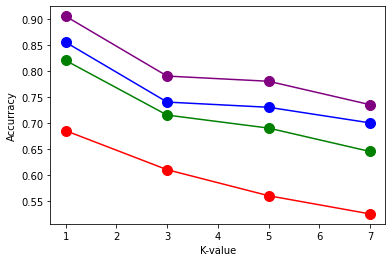

In [ ]:


plt.plot(neighbours,accuracy_matrix_1, color='red' ,linestyle='solid', marker='o', markerfacecolor='red', markersize=10)
#plt.show()

plt.plot(neighbours,accuracy_matrix_2, color='green' ,linestyle='solid', marker='o', markerfacecolor='green', markersize=10)
#plt.show()

plt.plot(neighbours,accuracy_matrix_3, color='blue' ,linestyle='solid', marker='o', markerfacecolor='blue', markersize=10)
#plt.show()

plt.plot(neighbours,accuracy_matrix_4, color='purple' ,linestyle='solid', marker='o', markerfacecolor='purple', markersize=10)
plt.xlabel('K-value')
plt.ylabel('Accurracy')
plt.show()





#Bouns

In [ ]:
#X_train>> training_data
#X_test>>  test_data

#y_train>> training_labels
#y_test>>  test_labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Data_Matrix_D, Label_Vector_Y, test_size=0.3) # 70% training and 30% test
                  

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 10304)
(280, 1)
(120, 10304)
(120, 1)


In [ ]:
alpha1=0.8
alpha2=0.85
alpha3=0.9
alpha4=0.95

sum_of_eigen_values_lower_v2=0
fraction_of_total_variance_v2=[]

projection_matrix_1_v2=[]
projection_matrix_2_v2=[]
projection_matrix_3_v2=[]
projection_matrix_4_v2=[]

#computing projection matrices(a)

Mean_v2=np.mean(X_train,axis=0) #computing the mean of every feature(column)

Z_v2=X_train - Mean_v2.T #centering the matrix  # el mfrood tb2a mean transpose?
Cov_matrix_v2=np.cov(Z_v2) #computing the covariance matrix
cov2_v2=(np.dot(Z_v2.T,Z_v2))/len(X_train)
Eigen_values_v2,Eigen_vectors_v2=LA.eigh(cov2_v2) #computing eigen values

indices_sorted_v2=Eigen_values_v2.argsort()[::-1]
sorted_values_v2=Eigen_values_v2[indices_sorted_v2]
sorted_vectors_v2=Eigen_vectors_v2[:,indices_sorted_v2]

In [ ]:
d_v2=len(sorted_values_v2) #number of eigen values
for i in range(0,d_v2):
  sum_of_eigen_values_lower_v2+=sorted_values_v2[i]

r_v2=1
while r_v2<=d_v2:

  sum_of_eigen_values_upper_v2=0

  for k in range(0,r_v2):
    sum_of_eigen_values_upper_v2+=sorted_values_v2[k]

  fraction_of_total_variance_v2.append((sum_of_eigen_values_upper_v2)/(sum_of_eigen_values_lower_v2)) #getting the fractions of total variance
  r_v2+=1

In [ ]:
r_values_1_v2=[]
r_values_2_v2=[]
r_values_3_v2=[]
r_values_4_v2=[]

for n in range(0,len(fraction_of_total_variance_v2)):
  if (fraction_of_total_variance_v2[n])>=alpha1:
    r_values_1_v2.append(n) #getting the r values such that f(r)>=alpha1

  if (fraction_of_total_variance_v2[n])>=alpha2:
    r_values_2_v2.append(n) #getting the r values such that f(r)>=alpha2

  if (fraction_of_total_variance_v2[n])>=alpha3:
    r_values_3_v2.append(n)  #getting the r values such that f(r)>=alpha3

  if (fraction_of_total_variance_v2[n])>=alpha4:
    r_values_4_v2.append(n)  #getting the r values such that f(r)>=alpha4

#getting the min r in every set
smallest_r_1_v2=(min(r_values_1_v2))+1 
smallest_r_2_v2=(min(r_values_2_v2))+1
smallest_r_3_v2=(min(r_values_3_v2))+1
smallest_r_4_v2=(min(r_values_4_v2))+1

#getting the projection matrices using r1,r2,r3,r4
for p_v2 in range(0,smallest_r_1_v2):
  projection_matrix_1_v2.append(sorted_vectors_v2[p_v2])

for q_v2 in range(0,smallest_r_2_v2):
  projection_matrix_2_v2.append(sorted_vectors_v2[q_v2])

for r_v2 in range(0,smallest_r_3_v2):
  projection_matrix_3_v2.append(sorted_vectors_v2[r_v2])

for s_v2 in range(0,smallest_r_4_v2):
  projection_matrix_4_v2.append(sorted_vectors_v2[s_v2])      

In [ ]:
#arrays of projection matrices lists
arr_proj_matrix1_v2 = np.array(projection_matrix_1_v2)
arr_proj_matrix2_v2 = np.array(projection_matrix_2_v2)
arr_proj_matrix3_v2 = np.array(projection_matrix_3_v2)
arr_proj_matrix4_v2 = np.array(projection_matrix_4_v2)

#projecting training and test datasets using the projection matrices(b)

reduced_training_data_1_v2=np.dot(X_train,arr_proj_matrix1_v2.T)
reduced_test_data_1_v2=np.dot(X_test,arr_proj_matrix1_v2.T)

reduced_training_data_2_v2=np.dot(X_train,arr_proj_matrix2_v2.T)
reduced_test_data_2_v2=np.dot(X_test,arr_proj_matrix2_v2.T)

reduced_training_data_3_v2=np.dot(X_train,arr_proj_matrix3_v2.T)
reduced_test_data_3_v2=np.dot(X_test,arr_proj_matrix3_v2.T)

reduced_training_data_4_v2=np.dot(X_train,arr_proj_matrix4_v2.T)
reduced_test_data_4_v2=np.dot(X_test,arr_proj_matrix4_v2.T)

print((reduced_training_data_1_v2.shape))
print((reduced_test_data_1_v2.shape))
print((reduced_training_data_2_v2.shape))
print((reduced_test_data_2_v2.shape))
print((reduced_training_data_3_v2.shape))
print((reduced_test_data_3_v2.shape))
print((reduced_training_data_4_v2.shape))
print((reduced_test_data_4_v2.shape))

(280, 78)
(120, 78)
(280, 116)
(120, 116)
(280, 180)
(120, 180)
(280, 292)
(120, 292)


In [ ]:
def KNN_Classifier_v2(k,training_data_reduced,test_data_reduced):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data_reduced,y_train)
  test_pred = classifier.predict(test_data_reduced)
  return test_pred

def KNN_Accuracy_v2(alpha,test_prediction):
   result=metrics.accuracy_score(y_test, test_prediction)
   output_v2=round(result,2)
   print("Accuracy for alpha = {} is {:.2f} ".format(alpha,output_v2))
   return output_v2  

In [ ]:
#Using a simple classifier,first Nearest Neighbor to determine the class labels(c)

#reduced_training_data_1
test_data_1_predection_v2=KNN_Classifier_v2(1,reduced_training_data_1_v2,reduced_test_data_1_v2)

#reduced_training_data_2
test_data_2_predection_v2=KNN_Classifier_v2(1,reduced_training_data_2_v2,reduced_test_data_2_v2)

#reduced_training_data_3
test_data_3_predection_v2=KNN_Classifier_v2(1,reduced_training_data_3_v2,reduced_test_data_3_v2)

#reduced_training_data_4
test_data_4_predection_v2=KNN_Classifier_v2(1,reduced_training_data_4_v2,reduced_test_data_4_v2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum

In [ ]:
#Report Accuracy for every value of alpha separately.

# for alpha =0.8
accurecy_alpha_1_v2= KNN_Accuracy_v2(0.8,test_data_1_predection_v2)

# for alpha =0.85
accurecy_alpha_2_v2=KNN_Accuracy_v2(0.85,test_data_2_predection_v2)

# for alpha =0.9
accurecy_alpha_3_v2=KNN_Accuracy_v2(0.9,test_data_3_predection_v2)

# for alpha =0.95
accurecy_alpha_4_v2=KNN_Accuracy_v2(0.95,test_data_4_predection_v2)


Accuracy for alpha = 0.8 is 0.76 
Accuracy for alpha = 0.85 is 0.82 
Accuracy for alpha = 0.9 is 0.91 
Accuracy for alpha = 0.95 is 0.94 


[0.76, 0.82, 0.91, 0.94]


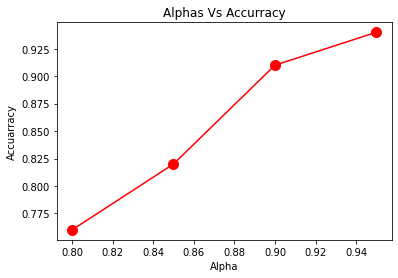

In [ ]:
alphas=[0.8,0.85,0.9,0.95]
Accuracies_v2=[]
Accuracies_v2.append(accurecy_alpha_1_v2)
Accuracies_v2.append(accurecy_alpha_2_v2)
Accuracies_v2.append(accurecy_alpha_3_v2)
Accuracies_v2.append(accurecy_alpha_4_v2)
print(Accuracies_v2)

plt.plot(alphas,Accuracies_v2, color='red' ,linestyle='solid', marker='o', markerfacecolor='red', markersize=10)
plt.title('Alphas Vs Accurracy')
plt.xlabel('Alpha')
plt.ylabel('Accuarracy')
plt.show()

In [ ]:
neighbours_v2 = [1,3,5,7]
accuracy_matrix_1_v2 = []
accuracy_matrix_2_v2 = []
accuracy_matrix_3_v2 = []
accuracy_matrix_4_v2 = []

for neighbour in neighbours_v2:
  #Using a simple classifier
  #accuracy_matrix_1
      test_data_1_predection_one_v2=KNN_Classifier_v2(neighbour,reduced_training_data_1_v2,reduced_test_data_1_v2)
      accuracy_matrix_1_v2.append(round(accuracy_score(test_data_1_predection_one_v2,y_test),2))
      #accuracy_matrix_2
      test_data_2_predection_two_v2=KNN_Classifier_v2(neighbour,reduced_training_data_2_v2,reduced_test_data_2_v2)
      accuracy_matrix_2_v2.append(round(accuracy_score(test_data_2_predection_two_v2,y_test),2))

      #accuracy_matrix_3
      test_data_3_predection_three_v2=KNN_Classifier_v2(neighbour,reduced_training_data_3_v2,reduced_test_data_3_v2)
      accuracy_matrix_3_v2.append(round(accuracy_score(test_data_3_predection_three_v2,y_test),2))

      #accuracy_matrix_4
      test_data_4_predection_four_v2=KNN_Classifier_v2(neighbour,reduced_training_data_4_v2,reduced_test_data_4_v2)
      accuracy_matrix_4_v2.append(round(accuracy_score(test_data_4_predection_four_v2,y_test),2))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum

In [ ]:
print(accuracy_matrix_1_v2)
print(accuracy_matrix_2_v2)
print(accuracy_matrix_3_v2)
print(accuracy_matrix_4_v2)

[0.76, 0.67, 0.59, 0.53]
[0.82, 0.74, 0.69, 0.66]
[0.91, 0.8, 0.8, 0.72]
[0.94, 0.89, 0.82, 0.78]


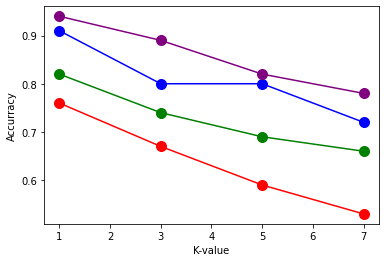

In [ ]:
plt.plot(neighbours_v2,accuracy_matrix_1_v2, color='red' ,linestyle='solid', marker='o', markerfacecolor='red', markersize=10)
#plt.show()

plt.plot(neighbours_v2,accuracy_matrix_2_v2, color='green' ,linestyle='solid', marker='o', markerfacecolor='green', markersize=10)
#plt.show()

plt.plot(neighbours_v2,accuracy_matrix_3_v2, color='blue' ,linestyle='solid', marker='o', markerfacecolor='blue', markersize=10)
#plt.show()

plt.plot(neighbours_v2,accuracy_matrix_4_v2, color='purple' ,linestyle='solid', marker='o', markerfacecolor='purple', markersize=10)
plt.xlabel('K-value')
plt.ylabel('Accurracy')
plt.show()